In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

import time

In [2]:
## filenames with different datasets
#files = ['CLEANED_sobolsampling-2048.csv', 'CLEANED_sobolsampling-2048-2.csv', 'CLEANED_gridsearch_1296.csv', 'CLEANED_gridsearch_2401.csv']
#names = ["SOBOL1", "SOBOL2", "GRID1296", "GRID2401"]

## dataframe with previously optimized parameters for another testing of the model(s)
opt = pd.DataFrame(data={'SigC': [0.3286], 'SigH': [0.2606], 'EpsC': [0.6730], 'EpsH': [0.1194], 'density': [707.0]})
x_opt = opt.drop('density', axis=1)
y_opt = opt['density']

## read data

In [3]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol2 sampling
data_sobol1 = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol1 = data_sobol1.drop(data_sobol1.columns[0], axis=1)
X_sobol1 = data_sobol1.drop('density', axis=1)
Y_sobol1 = data_sobol1['density']
#print(f'{data_sobol1}')
#print(f'{X_sobol1}')
#print(f'{Y_sobol1}')

## sobol2 sampling
data_sobol2 = pd.read_csv('CLEANED_sobolsampling-2048-2.csv')
data_sobol2 = data_sobol2.drop(data_sobol2.columns[0], axis=1)
X_sobol2 = data_sobol2.drop('density', axis=1)
Y_sobol2 = data_sobol2['density']
#print(f'{data_sobol2}')
#print(f'{X_sobol2}')
#print(f'{Y_sobol2}')

## prepare data

In [14]:
## suggestions for random ints
#random_array = np.random.rand(30)*100
#random_array = random_array.astype(int)
#print(f'{random_array}')

## actually used random ints hard coded
random_ints = [678, 147, 561, 237, 588, 951, 490, 395, 877, 297, 721, 711, 985, 171, 75, 16, 669, 530, 999, 794, 936, 111, 816, 968, 48, 986, 829, 996, 272, 759, 390, 930, 633, 928, 854, 554, 562, 78, 222, 294, 725, 582, 731, 249, 791, 35, 180, 510, 593, 634]
#print(f'{np.sort(random_ints)}')

In [15]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling 1
X_TRAINsSobol1 = []
X_TESTsSobol1 = []
Y_TRAINsSobol1 = []
Y_TESTsSobol1 = []

## sobol sampling 2
X_TRAINsSobol2 = []
X_TESTsSobol2 = []
Y_TRAINsSobol2 = []
Y_TESTsSobol2 = []

    
for i in random_ints:
    #print(f'{i}')
    ## use the X_test, Y_test data for testing combined with all the data of the other datasets
    X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=0.05, random_state=i)
    X_TRAINs1296.append(X_train)
    Y_TRAINs1296.append(Y_train)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    X_test = pd.concat([X_test, X_2401, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_2401, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs1296.append(X_test)
    Y_TESTs1296.append(Y_test)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=0.05, random_state=i)
    X_TRAINs2401.append(X_train),
    Y_TRAINs2401.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_sobol1, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_sobol1, Y_sobol2], ignore_index=True)
    X_TESTs2401.append(X_test)
    Y_TESTs2401.append(Y_test)
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol1, Y_sobol1, test_size=0.05, random_state=i)
    X_TRAINsSobol1.append(X_train)
    Y_TRAINsSobol1.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol2], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol2], ignore_index=True)
    X_TESTsSobol1.append(X_test)
    Y_TESTsSobol1.append(Y_test)
    
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol2, Y_sobol2, test_size=0.05, random_state=i)
    X_TRAINsSobol2.append(X_train)
    Y_TRAINsSobol2.append(Y_train)
    X_test = pd.concat([X_test, X_1296, X_2401, X_sobol1], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401, Y_sobol1], ignore_index=True)
    X_TESTsSobol2.append(X_test)
    Y_TESTsSobol2.append(Y_test)

## create and train models

In [16]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling 1
MODELsSobol1 = []
Y_PREDICTIONsSobol1 = []
RMSEsSobol1 = []
R2sSobol1 = []
SPEARMANRsSobol1 = []

## sobol sampling 2
MODELsSobol2 = []
Y_PREDICTIONsSobol2 = []
RMSEsSobol2 = []
R2sSobol2 = []
SPEARMANRsSobol2 = []
    
for i in range(0, len(random_ints)):
    print(f'{i+1}/{len(random_ints)}')
    ## create the model
    model1296 = RandomForestRegressor(random_state=random_ints[i])
    #
    model2401 = RandomForestRegressor(random_state=random_ints[i])
    #
    modelSobol1 = RandomForestRegressor(random_state=random_ints[i])
    #
    modelSobol2 = RandomForestRegressor(random_state=random_ints[i])
    
    ## train/fit the model
    model1296.fit(X_TRAINs1296[i], Y_TRAINs1296[i])
    MODELs1296.append(model1296)
    #
    model2401.fit(X_TRAINs2401[i], Y_TRAINs2401[i])
    MODELs2401.append(model2401)
    #
    modelSobol1.fit(X_TRAINsSobol1[i], Y_TRAINsSobol1[i])
    MODELsSobol1.append(modelSobol1)
    #
    modelSobol2.fit(X_TRAINsSobol2[i], Y_TRAINsSobol2[i])
    MODELsSobol2.append(modelSobol2)
    
    ## prediction using the test set
    Y_prediction1296 = model1296.predict(X_TESTs1296[i])
    Y_PREDICTIONs1296.append(Y_prediction1296)
    #
    Y_prediction2401 = model2401.predict(X_TESTs2401[i])
    Y_PREDICTIONs2401.append(Y_prediction2401)
    #
    Y_predictionSobol1 = modelSobol1.predict(X_TESTsSobol1[i])
    Y_PREDICTIONsSobol1.append(Y_predictionSobol1)
    #
    Y_predictionSobol2 = modelSobol2.predict(X_TESTsSobol2[i])
    Y_PREDICTIONsSobol2.append(Y_predictionSobol2)
    
    ## evaluate with Y_test
    rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[i], Y_prediction1296))
    r21296 = r2_score(Y_TESTs1296[i], Y_prediction1296)
    spearman_r1296 = stats.spearmanr(Y_TESTs1296[i], Y_prediction1296)
    RMSEs1296.append(rmse1296)
    R2s1296.append(r21296)
    SPEARMANRs1296.append(spearman_r1296.statistic)
    #
    rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[i], Y_prediction2401))
    r22401 = r2_score(Y_TESTs2401[i], Y_prediction2401)
    spearman_r2401 = stats.spearmanr(Y_TESTs2401[i], Y_prediction2401)
    RMSEs2401.append(rmse2401)
    R2s2401.append(r22401)
    SPEARMANRs2401.append(spearman_r2401.statistic)
    #
    rmseSobol1 = np.sqrt(mean_squared_error(Y_TESTsSobol1[i], Y_predictionSobol1))
    r2Sobol1 = r2_score(Y_TESTsSobol1[i], Y_predictionSobol1)
    spearman_rSobol1 = stats.spearmanr(Y_TESTsSobol1[i], Y_predictionSobol1)
    RMSEsSobol1.append(rmseSobol1)
    R2sSobol1.append(r2Sobol1)
    SPEARMANRsSobol1.append(spearman_rSobol1.statistic)
    #
    rmseSobol2 = np.sqrt(mean_squared_error(Y_TESTsSobol2[i], Y_predictionSobol2))
    r2Sobol2 = r2_score(Y_TESTsSobol2[i], Y_predictionSobol2)
    spearman_rSobol2 = stats.spearmanr(Y_TESTsSobol2[i], Y_predictionSobol2)
    RMSEsSobol2.append(rmseSobol2)
    R2sSobol2.append(r2Sobol2)
    SPEARMANRsSobol2.append(spearman_rSobol2.statistic)

print(f'done.\n')

1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50
12/50
13/50
14/50
15/50
16/50
17/50
18/50
19/50
20/50
21/50
22/50
23/50
24/50
25/50
26/50
27/50
28/50
29/50
30/50
31/50
32/50
33/50
34/50
35/50
36/50
37/50
38/50
39/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50
48/50
49/50
50/50
done.



## plots

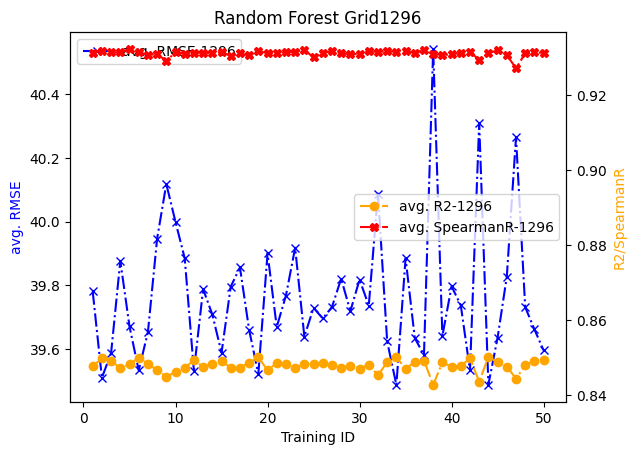

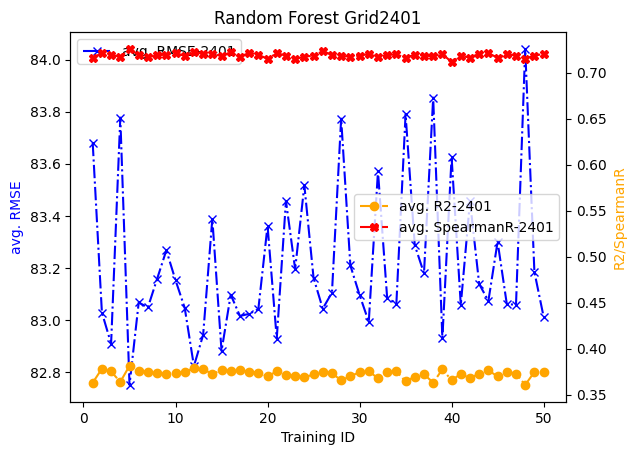

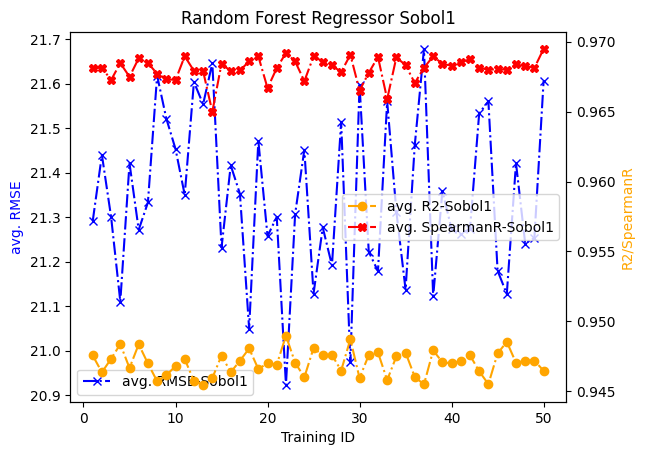

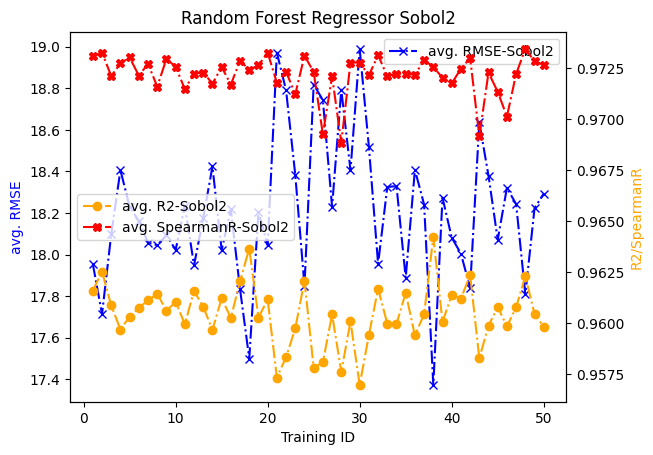

In [21]:
## Grid Sampling 1296
trainings = np.linspace(1, len(random_ints), len(random_ints))

fig, ax1 = plt.subplots()
ax1.plot(trainings, RMSEs1296, '-.x', color='blue', label='avg. RMSE-1296')
ax1.set_xlabel('Training ID')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Grid1296')

ax2 = ax1.twinx()
ax2.plot(trainings, R2s1296, '-.o', color='orange', label='avg. R2-1296')
ax2.plot(trainings, SPEARMANRs1296, '-.X', color='red', label='avg. SpearmanR-1296')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_GRID1296_test-diff-trainings.png')


## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(trainings, RMSEs2401, '-.x', color='blue', label='avg. RMSE-2401')
ax1.set_xlabel('Training ID')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Grid2401')

ax2 = ax1.twinx()
ax2.plot(trainings, R2s2401, '-.o', color='orange', label='avg. R2-2401')
ax2.plot(trainings, SPEARMANRs2401, '-.X', color='red', label='avg. SpearmanR-2401')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_GRID2401_test-diff-trainings.png')


## Sobol 1
fig, ax1 = plt.subplots()
ax1.plot(trainings, RMSEsSobol1, '-.x', color='blue', label='avg. RMSE-Sobol1')
ax1.set_xlabel('Training ID')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Regressor Sobol1')

ax2 = ax1.twinx()
ax2.plot(trainings, R2sSobol1, '-.o', color='orange', label='avg. R2-Sobol1')
ax2.plot(trainings, SPEARMANRsSobol1, '-.X', color='red', label='avg. SpearmanR-Sobol1')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_Sobol-1_test-diff-trainings.png')


## Sobol 2
fig, ax1 = plt.subplots()
ax1.plot(trainings, RMSEsSobol2, '-.x', color='blue', label='avg. RMSE-Sobol2')
ax1.set_xlabel('Training ID')
ax1.set_ylabel('avg. RMSE', color='blue')
plt.legend()
plt.title('Random Forest Regressor Sobol2')

ax2 = ax1.twinx()
ax2.plot(trainings, R2sSobol2, '-.o', color='orange', label='avg. R2-Sobol2')
ax2.plot(trainings, SPEARMANRsSobol2, '-.X', color='red', label='avg. SpearmanR-Sobol2')
ax2.set_ylabel('R2/SpearmanR', color='orange')
plt.legend()

plt.show()
fig.savefig('RF_Sobol-2_test-diff-trainings.png')